In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [130]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [131]:
X = df

In [132]:
scores = [feature for feature in df.columns if df[feature].dtype != 'O']
y = df[scores].sum(axis=1)

In [133]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [134]:
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [135]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
 
numeric_transformer = StandardScaler()
one_hot = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',one_hot,cat_features),
        ('StandardScaler',numeric_transformer, num_features)
    ]
)

X = preprocessor.fit_transform(X)

In [136]:
X.shape

(1000, 20)

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

X_train.shape, y_train.shape

((800, 20), (800,))

In [138]:
def eval_metrics(true, predicted):
    mae = round(mean_absolute_error(true, predicted), 4)
    mse = round(mean_squared_error(true, predicted), 4)
    rmse = round(np.sqrt(mean_squared_error(true, predicted)), 4)
    r2_square = round(r2_score(true, predicted), 4)
    return mae, mse, rmse, r2_square

In [139]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor()
}



In [140]:
r_2= {}
for model_name,model in models.items():
    model.fit(X_train, y_train)

    # Make predictions
    
    y_pred = model.predict(X_test)
    model_mae, model_mse, model_rmse, model_r2 = eval_metrics(y_test, y_pred)
    print(f'{model_name} has scores:') 
    print('MAE: {}'.format(model_mae))
    print('MSE: {}'.format(model_mse))
    print('RMSE: {}'.format(model_rmse))
    print('R_square: {}'.format(model_r2))
    r_2[model_name] = model_r2
    

Linear Regression has scores:
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R_square: 1.0
Lasso has scores:
MAE: 0.8504
MSE: 1.1044
RMSE: 1.0509
R_square: 0.9994
Ridge has scores:
MAE: 0.0187
MSE: 0.0005
RMSE: 0.0233
R_square: 1.0
K-Neighbors Regressor has scores:
MAE: 6.699
MSE: 70.0662
RMSE: 8.3706
R_square: 0.9603
Decision Tree has scores:
MAE: 3.325
MSE: 20.405
RMSE: 4.5172
R_square: 0.9884
Random Forest Regressor has scores:
MAE: 1.4695
MSE: 4.918
RMSE: 2.2177
R_square: 0.9972
XGBRegressor has scores:
MAE: 1.5481
MSE: 4.3381
RMSE: 2.0828
R_square: 0.9975
CatBoosting Regressor has scores:
MAE: 0.6842
MSE: 1.1237
RMSE: 1.06
R_square: 0.9994
AdaBoost Regressor has scores:
MAE: 5.1063
MSE: 42.3152
RMSE: 6.505
R_square: 0.976


In [141]:
r_2

{'Linear Regression': 1.0,
 'Lasso': 0.9994,
 'Ridge': 1.0,
 'K-Neighbors Regressor': 0.9603,
 'Decision Tree': 0.9884,
 'Random Forest Regressor': 0.9972,
 'XGBRegressor': 0.9975,
 'CatBoosting Regressor': 0.9994,
 'AdaBoost Regressor': 0.976}

In [142]:
x = zip(r_2.items())

In [143]:
pd.DataFrame(list(zip(r_2.keys(), r_2.values())), columns=['Model Name','R_2 Score'])\
    .sort_values(by='R_2 Score', ascending=False)

,Model Name,R_2 Score
0,Linear Regression,1.0000
2,Ridge,1.0000
1,Lasso,0.9994
7,CatBoosting Regressor,0.9994
6,XGBRegressor,0.9975
5,Random Forest Regressor,0.9972
4,Decision Tree,0.9884
8,AdaBoost Regressor,0.9760
3,K-Neighbors Regressor,0.9603


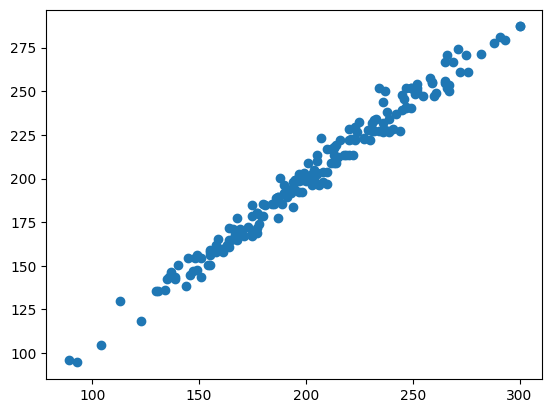

In [144]:
plt.scatter(y_test, y_pred);

<Axes: >

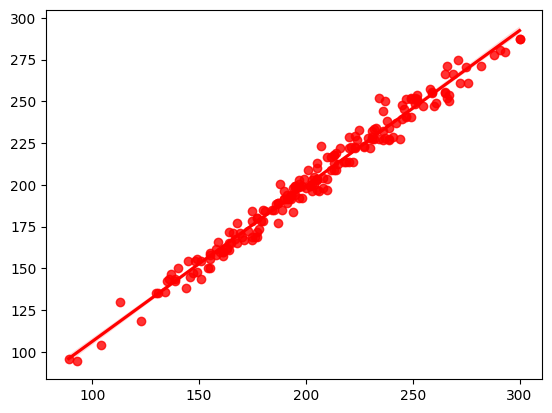

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=2, color='red')

# seaborn.regplot() function is a combined scatter plot + regression line plot. It’s commonly used to visualize the linear relationship between two numeric variables
# it tells you how well the predicted values match the true values